# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [3]:
cities

['wailua homesteads',
 'port-aux-francais',
 'praia da vitoria',
 'grytviken',
 'misratah',
 'decazeville',
 'fada',
 'iqaluit',
 'ilhabela',
 'fort st. john',
 'maryborough',
 'isafjordur',
 'ilulissat',
 'papatowai',
 'waitangi',
 'margaret river',
 'invercargill',
 'edinburgh of the seven seas',
 'manismata',
 'daru',
 'college',
 'ushuaia',
 'adamstown',
 'longyearbyen',
 'nova sintra',
 'kyaikkami',
 'vorgashor',
 'talnakh',
 'huarmey',
 'bayan nur',
 'portland',
 'east london',
 'lebu',
 'santo antonio',
 'taiohae',
 'kuta',
 'smithers',
 'tofol',
 'okha',
 'kodiak',
 'campbell river',
 'hovd',
 'dudinka',
 'aykhal',
 'kharp',
 'albany',
 'crane',
 'bethel',
 'kapuskasing',
 'weno',
 'yellowknife',
 'masterton',
 'udachny',
 'puerto natales',
 'petropavlovsk-kamchatsky',
 'gorontalo',
 'kailua-kona',
 'kunszentmiklos',
 'bilibino',
 'saint-pierre',
 'thompson',
 'teofilo otoni',
 'dunedin',
 'stanley',
 'santa terezinha',
 'hawaiian paradise park',
 'washington',
 'ouro preto do 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | praia da vitoria
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | misratah
Processing Record 6 of Set 1 | decazeville
Processing Record 7 of Set 1 | fada
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | ilhabela
Processing Record 10 of Set 1 | fort st. john
Processing Record 11 of Set 1 | maryborough
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | manismata
Processing Record 20 of Set 1 | daru
Processing Record 21 of Set 1 | college
Processing Record 22 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,26.24,84,75,3.09,US,1691261750
1,port-aux-francais,-49.3500,70.2167,2.42,72,97,13.98,TF,1691261712
2,praia da vitoria,38.7333,-27.0667,25.14,73,20,2.81,PT,1691261895
3,grytviken,-54.2811,-36.5092,-5.25,83,100,5.30,GS,1691261895
4,misratah,32.3754,15.0925,26.95,59,0,9.02,LY,1691261895


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,26.24,84,75,3.09,US,1691261750
1,port-aux-francais,-49.3500,70.2167,2.42,72,97,13.98,TF,1691261712
2,praia da vitoria,38.7333,-27.0667,25.14,73,20,2.81,PT,1691261895
3,grytviken,-54.2811,-36.5092,-5.25,83,100,5.30,GS,1691261895
4,misratah,32.3754,15.0925,26.95,59,0,9.02,LY,1691261895


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

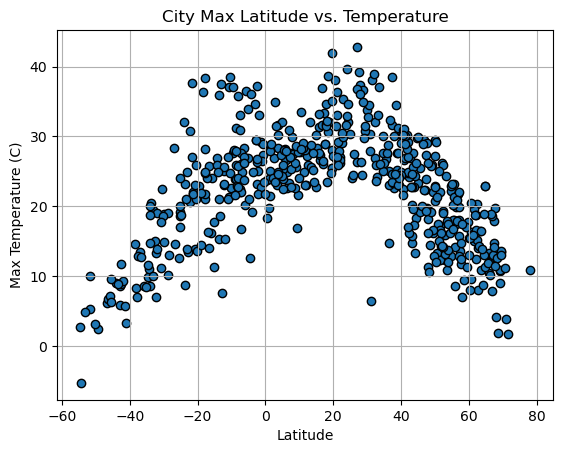

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

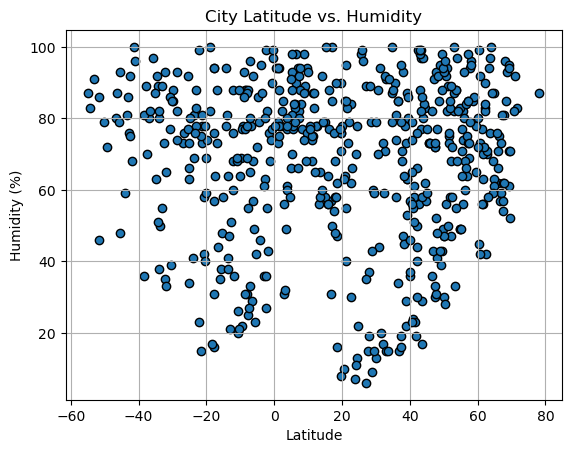

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

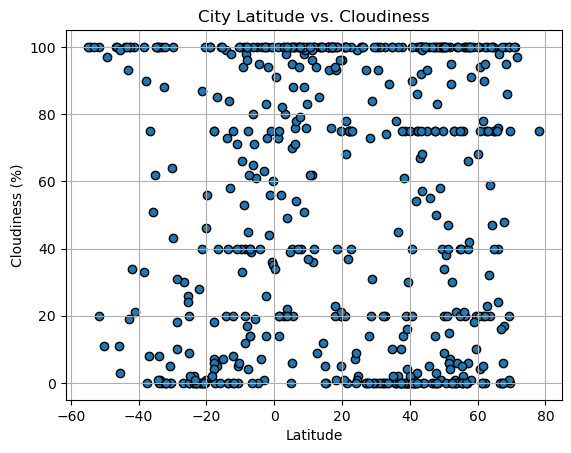

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

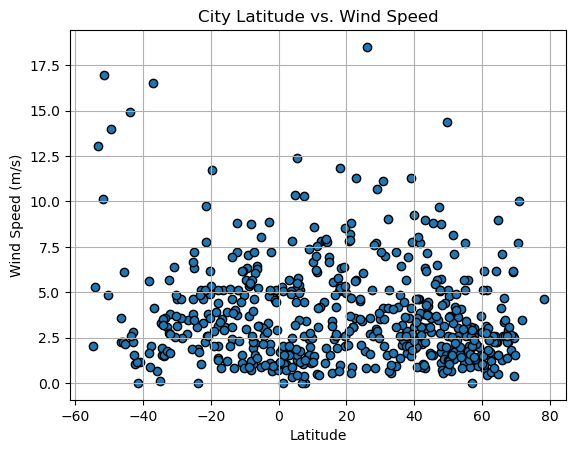

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

regress_values

City_ID
0      22.345308
1      22.434925
2      22.324395
3      22.441112
4      22.332373
         ...    
555    22.359739
556    22.372525
557    22.368145
558    22.298231
559    22.320249
Name: Lat, Length: 560, dtype: float64

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,26.24,84,75,3.09,US,1691261750
2,praia da vitoria,38.7333,-27.0667,25.14,73,20,2.81,PT,1691261895
4,misratah,32.3754,15.0925,26.95,59,0,9.02,LY,1691261895
5,decazeville,44.5605,2.2509,18.38,83,100,1.66,FR,1691261896
6,fada,9.5667,8.3000,21.61,94,100,1.08,NG,1691261896


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,2.42,72,97,13.98,TF,1691261712
3,grytviken,-54.2811,-36.5092,-5.25,83,100,5.30,GS,1691261895
8,ilhabela,-23.7781,-45.3581,23.22,69,2,1.87,BR,1691261896
10,maryborough,-25.5333,152.7000,12.68,92,26,1.89,AU,1691261896
13,papatowai,-46.5619,169.4708,6.20,80,100,3.57,NZ,1691261711


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values)
print("")
print(line_eq)

City_ID
0      26.866859
2      22.831600
4      24.370971
5      21.420723
6      29.893399
         ...    
555    29.651231
556    32.118355
557    31.273213
558    17.783412
559    22.031662
Name: Lat, Length: 386, dtype: float64

y= -0.24x +32.21


The r-value is: 0.429703318054413


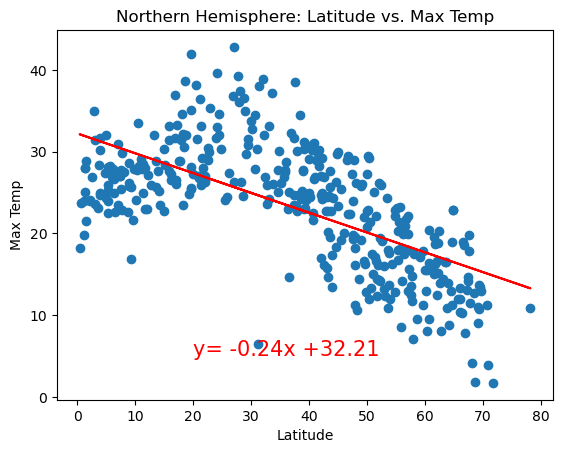

In [17]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
plt.annotate(line_eq, (20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [18]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope + intercept

line_eq_southern = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values_southern)
print("")
print(line_eq_southern)

City_ID
1       6.458810
3       4.105049
8      18.665038
10     17.827229
13      7.789653
         ...    
539    23.650652
541    25.782406
549    25.938350
551    26.398735
552    14.621148
Name: Lat, Length: 174, dtype: float64

y= 0.48x +30.02


The r-value is: 0.5807695354926533


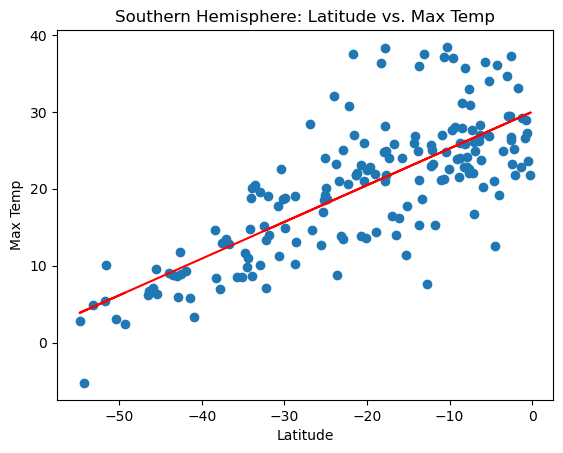

In [19]:
plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
line_eq_southern= "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))


plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
plt.annotate(line_eq_southern,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 


During this time of year (August), the relationship between latitude and temperature in the northern hemisphere is negative.  The latitude increases and the temperature decreases.  In the southern hemisphere, there is a positive slope.  The latitude increases and the temperature increases.  This all makes sense as the temperatures would tend to drop the further you move away from the equator (Latitude=0).

### Humidity vs. Latitude Linear Regression Plot

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values)
print("")
print(line_eq)

City_ID
0      68.947106
2      68.801602
4      68.857109
5      68.750728
6      69.056237
         ...    
555    69.047505
556    69.136465
557    69.105991
558    68.619573
559    68.772757
Name: Lat, Length: 386, dtype: float64

y= -0.01x +69.14


The r-value is: 6.272071932955703e-05


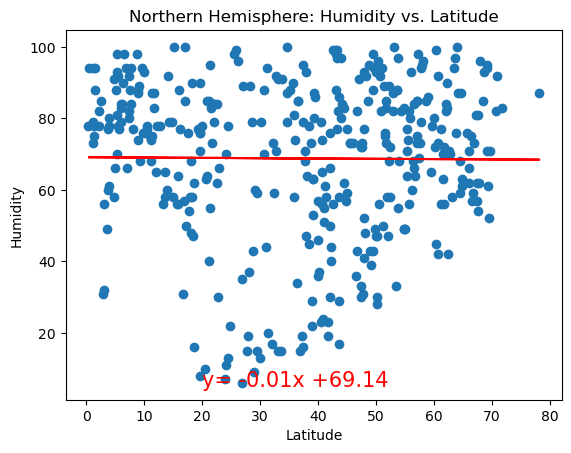

In [21]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Humidity vs. Latitude")

plt.annotate(line_eq, (20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [22]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope + intercept

line_eq_southern = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values_southern)
print("")
print(line_eq_southern)

City_ID
1      76.978265
3      78.622847
8      68.449727
10     69.035107
13     76.048400
         ...    
539    64.966259
541    63.476794
549    63.367836
551    63.046163
552    71.275208
Name: Lat, Length: 174, dtype: float64

y= -0.33x +60.52


The r-value is: 0.04414870891544027


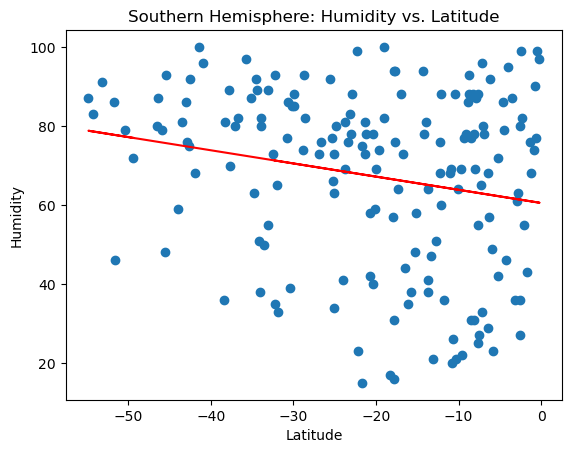

In [23]:
plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
line_eq_southern= "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Humidity vs. Latitude")

plt.annotate(line_eq_southern,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

In the relationship between Humidity and Latitude, the northern hemisphere has a very slight negative (almost even) slope with the humidity decreasing as the latitude increases.  The Southern hemisphere has a slight positive slope with the humidity increasing with the increase in latitude.  As you get closer the the equator (Latitude=0), the humidity drops at least at this point in time (August).

### Cloudiness vs. Latitude Linear Regression Plot

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values)
print("")
print(line_eq)

City_ID
0      58.780318
2      53.127745
4      55.284089
5      51.151393
6      63.019884
         ...    
555    62.680656
556    66.136593
557    64.952722
558    46.056263
559    52.007195
Name: Lat, Length: 386, dtype: float64

y= -0.34x +66.26


The r-value is: 0.027809084796711816


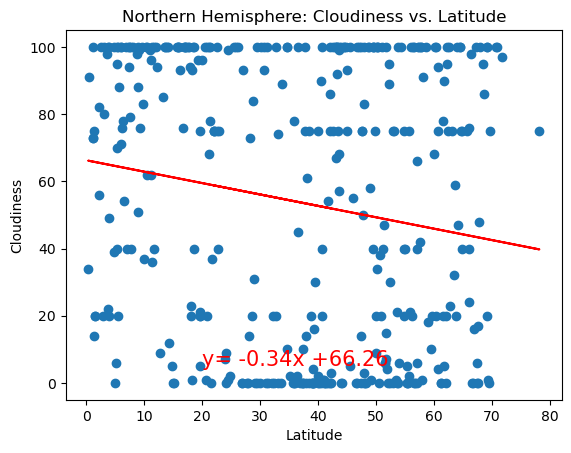

In [25]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")

plt.annotate(line_eq, (20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [26]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope + intercept

line_eq_southern = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values_southern)
print("")
print(line_eq_southern)

City_ID
1      48.932586
3      49.448558
8      46.256838
10     46.440496
13     48.640850
         ...    
539    45.163934
541    44.696628
549    44.662444
551    44.561522
552    47.143306
Name: Lat, Length: 174, dtype: float64

y= -0.1x +43.77


The r-value is: 0.0013625432629118981


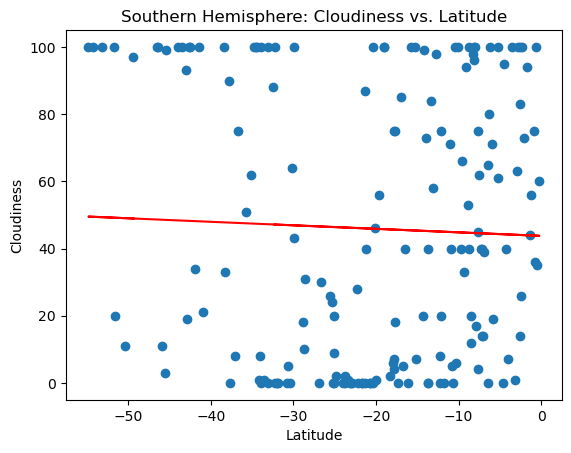

In [27]:
plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
line_eq_southern= "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")

plt.annotate(line_eq_southern,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

In both the northern and southern hemisphere, there was a negative slope in the relationship between Cloudiness and Latitude.  In the northern hemisphere the cloudiness decreases as you move away from the equator.  In the southern hemisphere, the cloudness decreases as you move towards the equator but much less than in the northern hemisphere (in August).

### Wind Speed vs. Latitude Linear Regression Plot

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values)
print("")
print(line_eq)

City_ID
0      3.827315
2      3.565541
4      3.665402
5      3.474015
6      4.023651
         ...   
555    4.007941
556    4.167987
557    4.113162
558    3.238057
559    3.513648
Name: Lat, Length: 386, dtype: float64

y= -0.02x +4.17


The r-value is: 0.014925235986817659


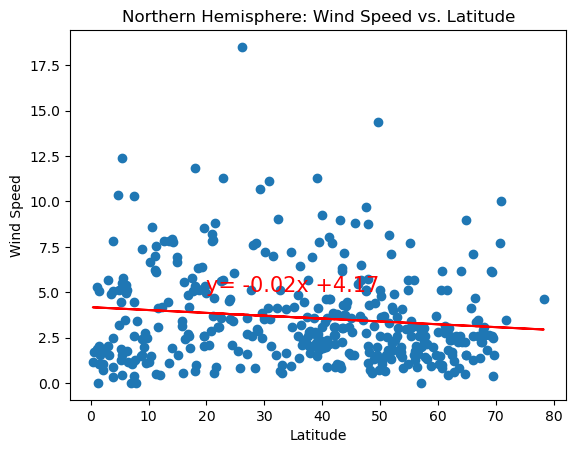

In [29]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")

plt.annotate(line_eq, (20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

In [30]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope + intercept

line_eq_southern = "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))

print(regress_values_southern)
print("")
print(line_eq_southern)

City_ID
1      4.751361
3      4.891444
8      4.024916
10     4.074777
13     4.672157
         ...   
539    3.728200
541    3.601331
549    3.592050
551    3.564650
552    4.265585
Name: Lat, Length: 174, dtype: float64

y= -0.03x +3.35


The r-value is: 0.019130095765939086


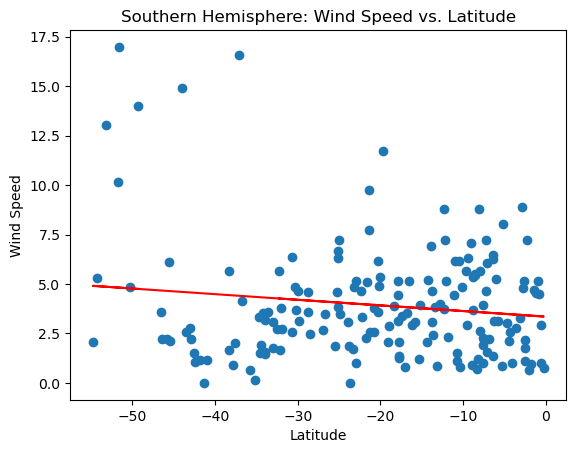

In [31]:
plt.scatter(x_values_southern,y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
line_eq_southern= "y= " +str(round(slope,2)) + "x +" +str(round(intercept,2))


plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")

plt.annotate(line_eq_southern,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

During this time of year (August), the northern hemisphere has a very slight negative slope which indicates the wind speeds decrease as the latitude increases.  It is windier in the northern hemisphere at the equator. At the same time, the southern hemispher also has a negative slope and the wind speed decreases as you get closer to the equator.